In [1]:
# 필요 라이브러리 부르기
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
#폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\LeelawUI.ttf',
 'C:\\Windows\\Fonts\\BELLB.TTF',
 'C:\\Windows\\Fonts\\ITCBLKAD.TTF',
 'C:\\Windows\\Fonts\\taileb.ttf',
 'C:\\Windows\\Fonts\\ERASLGHT.TTF',
 'C:\\Windows\\Fonts\\times.ttf',
 'C:\\Windows\\Fonts\\ariblk.ttf',
 'C:\\Windows\\Fonts\\BOD_BLAR.TTF',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\Candarab.ttf',
 'C:\\Windows\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\GOTHICI.TTF',
 'C:\\Windows\\Fonts\\FRABK.TTF',
 'C:\\Windows\\Fonts\\HMFMMUEX.TTC',
 'C:\\Windows\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\CENTURY.TTF',
 'C:\\Windows\\Fonts\\DUBAI-BOLD.TTF',
 'C:\\Windows\\Fonts\\simsun.ttc',
 'C:\\Windows\\Fonts\\ROCKBI.TTF',
 'C:\\Windows\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\msjhl.ttc',
 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf',
 'C:\\Windows\\Fonts\\LTYPEB.TTF',
 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf',
 'C:\\Windows\\Fonts\\SitkaI.ttc',
 'C:\\

In [8]:
import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 부르기
X, y = datasets.make_blobs(random_state=1)

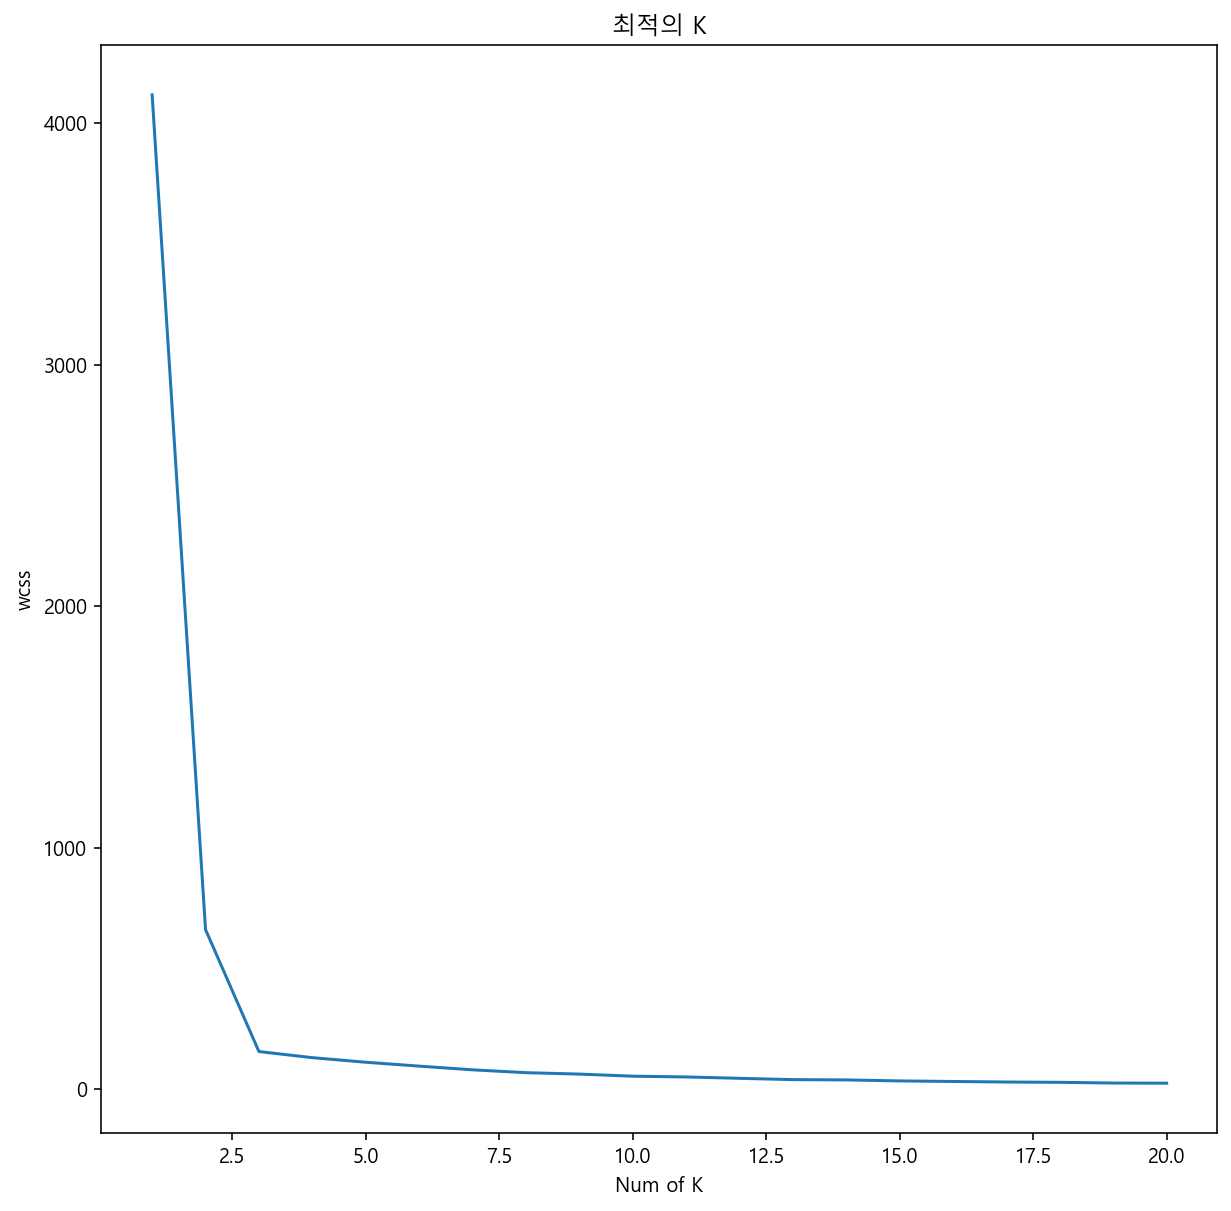

In [9]:
# 최적의 k 찾기
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters= i,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    tol=0.0001,
                    precompute_distances='deprecated',
                    verbose=0,
                    random_state=None,
                    copy_x=True,
                    n_jobs='deprecated',
                    algorithm='auto',
                   )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# 최적의 k를 찾기위한 plot
plt.figure(figsize=(10,10))
plt.plot(range(1,21), wcss)
plt.title('최적의 K')
plt.xlabel('Num of K')
plt.ylabel('wcss')
plt.show()

In [31]:
# Kmeans_Cluster 모델 생성
def Kmeans_Model(X,k):
    col = ['r','k','b','gray','orange','pink','black']
    # 모델 적용
    k_model = KMeans(n_clusters = k, init='k-means++', random_state=0)
    y_kmeans = k_model.fit_predict(X)
    
    # cluster를 그리기위한 plot
    plt.scatter(X[:,0], X[:,1],
           c = kmeans.labels_, marker='o', s=10)
    # 중심점을 표시하기 위한 plot
    plt.scatter(k_model.cluster_centers_[:,0],
               k_model.cluster_centers_[:,1],
               c = col[:k], marker='^', s=50)
    plt.title("K-Means 군집분석")
    
    
    return k_model, y_kmeans

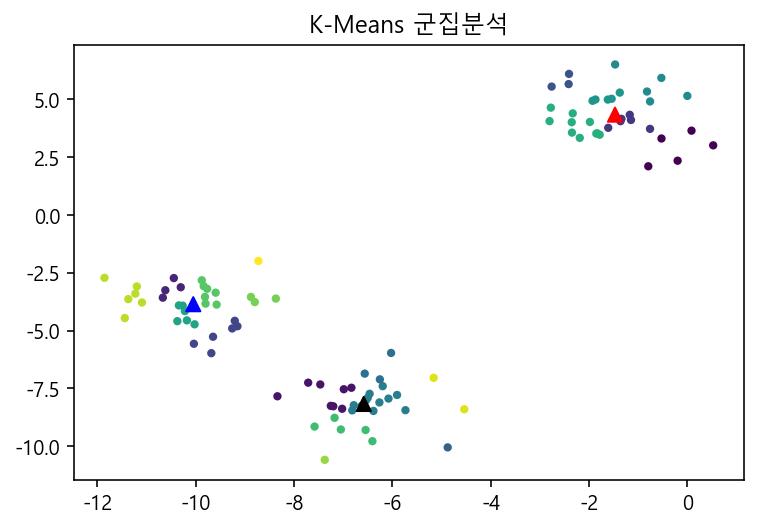

In [32]:
kmodel, y_pred = Kmeans_Model(X,3)